Series和DataFrame都有一个用于生成各类图表的plot方法。默认情况下，它们所生成的是线形图

In [28]:
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

## 线形图

简单的Series图表示例,plot()

In [29]:
import numpy as np

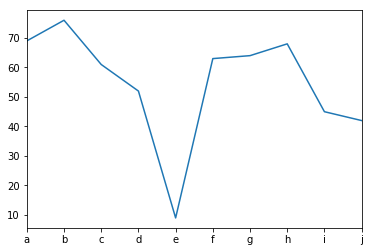

In [4]:
s = Series(np.random.randint(0,100,size = 10),index = list('abcdefghij'))

s.plot()

简单的DataFrame图表示例,plot()

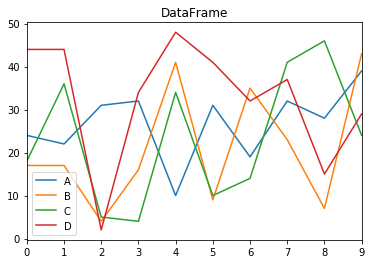

In [10]:
df = DataFrame(np.random.randint(0,50,size = (10,4)),columns=list('ABCD'))
df.plot(title='DataFrame')

## 柱状图

Series柱状图示例,kind = 'bar'/'barh'

DataFrame柱状图示例

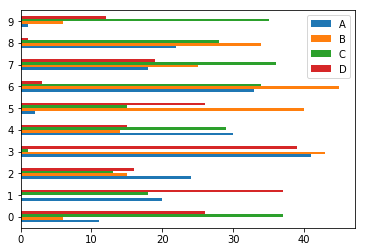

In [6]:
df.plot(kind = 'barh')

读取文件tips.csv，查看每天的聚会人数情况
每天各种聚会规模的比例  

求和并df.sum()，注意灵活使用axis

In [14]:
df = pd.read_csv('../../data/tips.csv')

In [15]:
df

,day,1,2,3,4,5,6
0,Fri,1,16,1,1,0,0
1,Stat,2,53,18,13,1,0
2,Sun,0,39,15,18,3,1
3,Thur,1,48,4,5,1,3


In [16]:
df.set_index('day',inplace=True)
df

,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Stat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


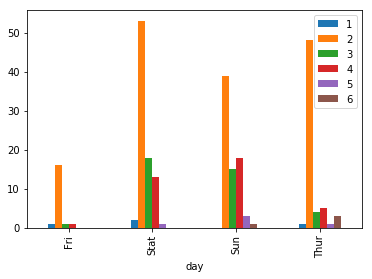

In [17]:
df.plot(kind = 'bar')

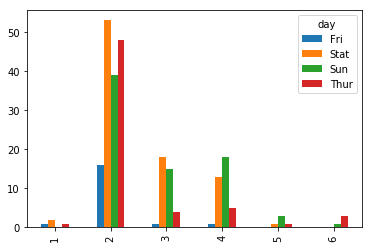

In [21]:
# 横列索引互换
df.stack().unstack(level = 0).plot(kind = 'bar')

## 直方图

rondom生成随机数百分比直方图，调用hist方法

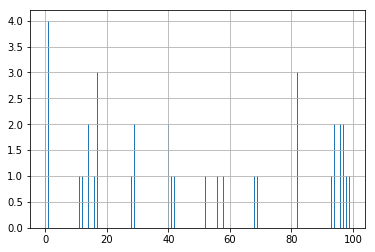

In [25]:
nd = np.random.randint(0,100,size = 100)

s = Series(nd)
#直方图用来表示密度，它是特殊的柱状图
# bins调整数据间隔
s.hist(bins = 1000)

随机数百分比密度图s.plot(kind = 'kde')

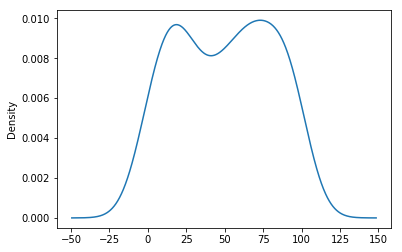

In [26]:
#density 密度
s.plot(kind = 'kde')

这两种图表经常被画在一起。直方图以规格化形式给出（以便给出面元化密度），然后再在其上绘制核密度估计。接下来来看一个由两个不同的标准正态分布组成的的双峰分布  

np.random.normal()正太分布函数  

直方图hist，函数中必须添加属性normed = True



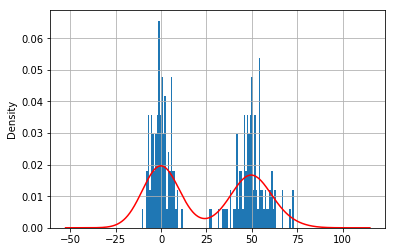

In [30]:
#直方图，和密度图绘制到一个图形中
n1 = np.random.normal(loc = 0,scale=5,size = 100)

n2 = np.random.normal(loc = 50,scale = 10,size = 100)

nd = np.concatenate([n1,n2])

s = Series(nd)

#kde 密度图
s.plot(kind = 'kde',style = 'red')

#绘制直方图
s.hist(normed = True,bins = 100)

## 散布图

散布图
散布图是观察两个一维数据数列之间的关系的有效方法  

注意使用kind = 'scatter'时，给明标签columns


In [31]:
df = DataFrame(np.random.randint(0,100,size = (50,4)),columns=list('ABCD'))
df

,A,B,C,D
0,89,46,78,27
1,66,32,83,30
2,41,63,1,50
3,57,3,65,76
4,74,17,98,21
5,70,47,4,5
6,3,29,91,69
7,0,8,66,44
8,72,82,3,98
9,40,10,77,79


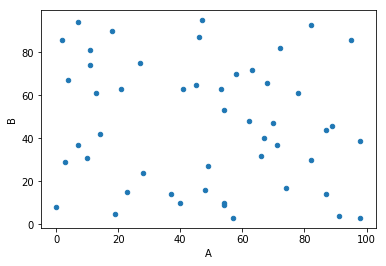

In [32]:
# scatter requires and x and y column
#A 数学成绩，B是Python
df.plot(x = 'A',y = 'B',kind = 'scatter')

散布图矩阵，当有多个点时，两两点的关系  

函数：pd.plotting.scatter_matrix(),注意参数diagnol：对角线

对角线部分： 核密度估计图（Kernel Density Estimation），就是用来看某 一个 变量分布情况，横轴对应着该变量的值，纵轴对应着该变量的密度（可以理解为出现频次）。 

非对角线部分：两个 变量之间分布的关联散点图。将任意两个变量进行配对，以其中一个为横坐标，另一个为纵坐标，将所有的数据点绘制在图上，用来衡量两个变量的关联度（Correlation）。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a281f8748>,
      dtype=object)

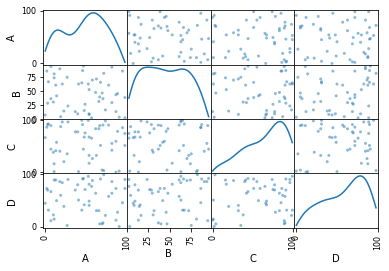

In [34]:
pd.plotting.scatter_matrix(df,diagonal='kde')